## Understand the DataSet

- price price in US dollars (\$326--\$18,823)

- carat weight of the diamond (0.2--5.01)

- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color diamond colour, from J (worst) to D (best)

- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

> x length in mm (0--10.74)

> y width in mm (0--58.9)

> z depth in mm (0--31.8)

>- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

>- table width of top of diamond relative to widest point (43--95)

# Problem Statement:

- The goal will be to use the features present in the dataset to predict the price of a diamond

- This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

## Read the DataSet

- Upload Dataset to Google Drive

- Mount the Google Drive

- Find the Path of File

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/MLDataSets

diamonds.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
from xgboost import XGBRegressor #ML Model
from sklearn.model_selection import train_test_split # Split data into Training and Testing 
from sklearn.model_selection import GridSearchCV # For Hyper Parameter Tuning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Model Evaluation Matrix

In [6]:
diamond_df = pd.read_csv('/content/drive/MyDrive/MLDataSets/diamonds.csv')
#diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Further Information about Data 

- Pandas Profiling

- Describe and Info

In [7]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Observations:

1. No Missing values

2. Few Categorical Data - Cut, Color, Clarity - Convert into Number by encoding methods

3. One Unnamed Column - Drop it

4. Price is Target / Label and Others are Features

In [8]:
diamond_df.drop(['Unnamed: 0'], axis =1, inplace=True)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamond_df.shape, diamond_df.isna().sum(), diamond_df.dtypes

((53940, 10),
 carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 price      0
 x          0
 y          0
 z          0
 dtype: int64,
 carat      float64
 cut         object
 color       object
 clarity     object
 depth      float64
 table      float64
 price        int64
 x          float64
 y          float64
 z          float64
 dtype: object)

In [10]:
diamond_df.describe() ## Basic Stistical Analysis - Find out any Distribution, Outlier concerns. 

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=452f635539f5f9b585ac439eede969b98f3ae73e4459279f1667f6478b826c3a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [12]:
from ydata_profiling import ProfileReport
profile = ProfileReport(diamond_df, title="Profiling Report")


In [13]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## Data Preparation ( Making Data Ready for Model)

Most Common Data Preperation Techaniques 

- Address Missing Values
- Address Skewed Distributions
- Address Outliers
- Convert Categorical to Numerical
- Drop Features which are not essential and Select Features which are most Important

- By inspecting the values for each of these variables, we can see that they’re categorical:

In [14]:
diamond_df.cut.value_counts(), diamond_df.color.value_counts(),diamond_df.clarity.value_counts()

(Ideal        21551
 Premium      13791
 Very Good    12082
 Good          4906
 Fair          1610
 Name: cut, dtype: int64,
 G    11292
 E     9797
 F     9542
 H     8304
 D     6775
 I     5422
 J     2808
 Name: color, dtype: int64,
 SI1     13065
 VS2     12258
 SI2      9194
 VS1      8171
 VVS2     5066
 VVS1     3655
 IF       1790
 I1        741
 Name: clarity, dtype: int64)

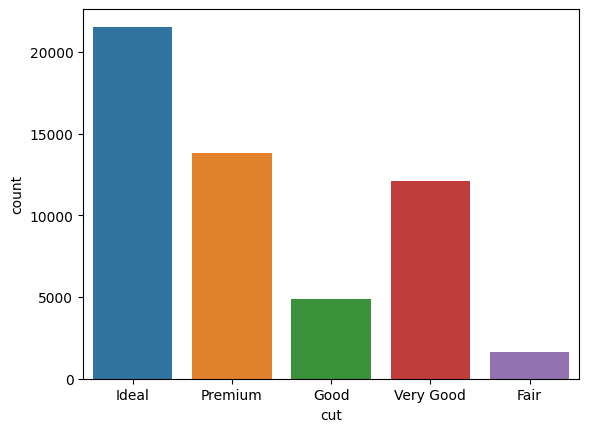

In [15]:
sns.countplot(data=diamond_df, x='cut')
plt.show()

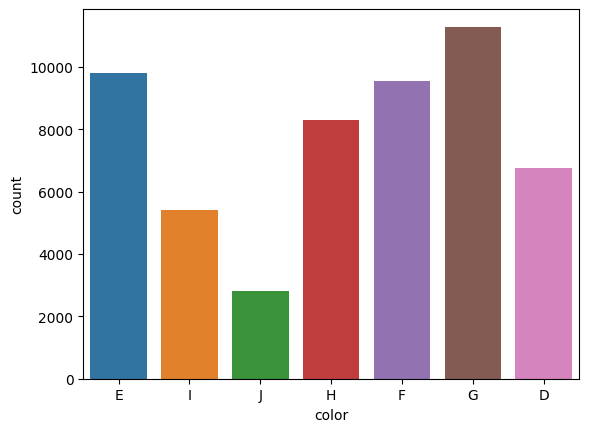

In [16]:
sns.countplot(data=diamond_df, x='color')
plt.show()

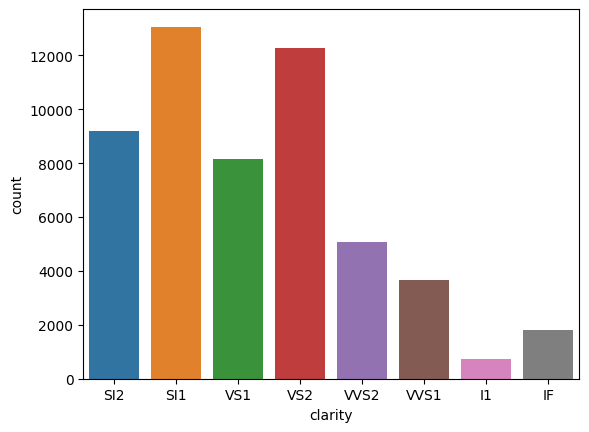

In [17]:
sns.countplot(data=diamond_df, x='clarity')
plt.show()

## Converting Categorical Value to Numerical value

Each diamond has a Cut, Color, and Clarity rating on a scale. For Cut, the scale(from highest to lowest) is Ideal>Premium>Very Good>Good>Fair.

Because of this hierarchy, we can call these ordinal categorical variables. We have to encode them according to the inherent scale if we want to appropriately capture the information in numeric form.

The easiest way to do this with so few categories in each variable is with mapping, but scikit-learn also has an OrdinalEncoder class:

In [18]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

# Encoding the ordinal categorical variable 'color'
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

### Note: Once we’ve encoded the ordinal variables, let’s get rid of any outliers and/or nonsense data.

First, any observations with an X,Y, or Z dimension of 0 are getting the ax:

In [19]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

Then, we’ll cut the dataset down to the 99th percentile based on a few different variables to get rid of the most egregious outliers. This is by no means a nuanced approach to handling outliers and a lot more effort would be put into this portion of the work in a real-world scenario:

In [20]:
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

## Correlation heatmap to see what features we can expect to influence price and how:

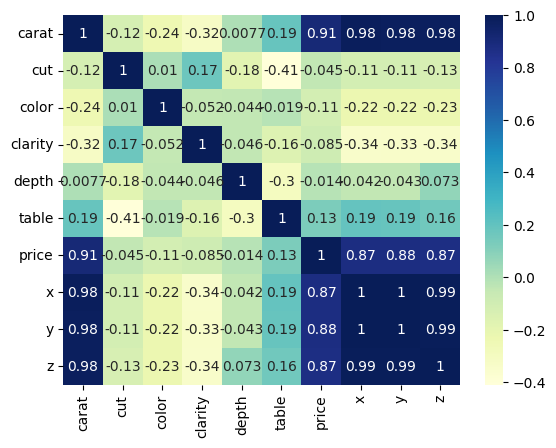

In [21]:
# plotting correlation heatmap
dataplot = sns.heatmap(diamond_df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()  

# Now Make Data Ready for Training

1. X, Y Data
2. Training and Testing Data

In [22]:
model_df = diamond_df.copy()
X = model_df.drop(['price'], axis=1)
y = model_df['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

## Create ML and Hyperparameter Tuning

- GridSearchCV at an XGBoost Regressor

In [23]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)



## Traing the Model, Evaluate the Mode & Tune the Model

In [ ]:
xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=True)

print("MAE:", mean_absolute_error(y_val, fit_model.predict(X_val)))
print("MSE:", mean_squared_error(y_val, fit_model.predict(X_val)))
print("R2:", r2_score(y_val, fit_model.predict(X_val)))

[0]	validation_0-mae:3526.34524	validation_1-mae:3539.19419
[1]	validation_0-mae:3491.31525	validation_1-mae:3504.01188
[2]	validation_0-mae:3456.62834	validation_1-mae:3469.16323
[3]	validation_0-mae:3422.23589	validation_1-mae:3434.65108


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-mae:3388.34254	validation_1-mae:3400.56713
[5]	validation_0-mae:3354.64228	validation_1-mae:3366.74339
[6]	validation_0-mae:3321.25165	validation_1-mae:3333.21693
[7]	validation_0-mae:3288.25725	validation_1-mae:3300.05674
[8]	validation_0-mae:3255.59704	validation_1-mae:3267.20248
[9]	validation_0-mae:3223.35068	validation_1-mae:3234.82139
[10]	validation_0-mae:3191.35456	validation_1-mae:3202.74381
[11]	validation_0-mae:3159.64601	validation_1-mae:3170.91522
[12]	validation_0-mae:3128.21558	validation_1-mae:3139.33145
[13]	validation_0-mae:3097.07700	validation_1-mae:3108.06878
[14]	validation_0-mae:3066.30935	validation_1-mae:3077.16721
[15]	validation_0-mae:3035.96112	validation_1-mae:3046.65594
[16]	validation_0-mae:3005.85989	validation_1-mae:3016.37905
[17]	validation_0-mae:2976.04118	validation_1-mae:2986.42190
[18]	validation_0-mae:2946.54018	validation_1-mae:2956.75188
[19]	validation_0-mae:2917.27380	validation_1-mae:2927.30070
[20]	validation_0-mae:2888.338

## Save the Model

In [ ]:
fit_model.save_model('xgb_model.json')